## Contents

* [Fashion MNIST classification train dataset](#fashion)
* [Improving model](#improve)
* [Same with raw numpy](#numpy)
* [Handwriting Digits MNIST classifier](#hdigits)
* [Adding Convolution layers](#conv1)

## <left>Fashion MNIST classification train dataset<a class="anchor" id="fashion"></a><left>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
data = fashion_mnist.load_data() # 

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

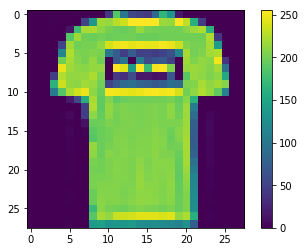

In [29]:
plt.imshow(train_images[1])
plt.colorbar()
plt.show()

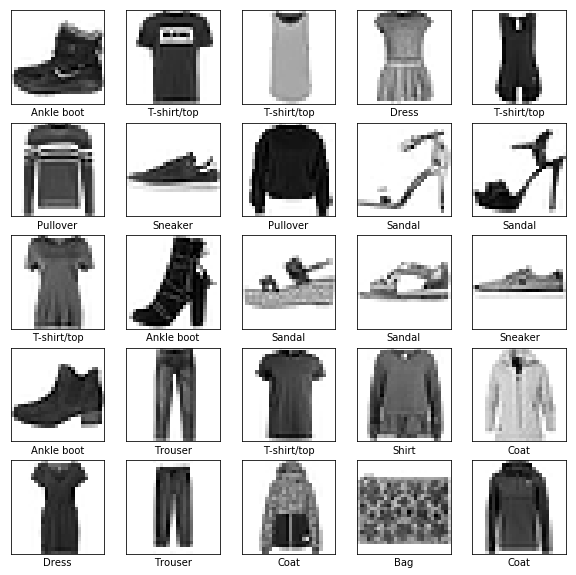

In [50]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [35]:
# 3 layered architecture
# Sequential defines a SEQUENCE of layers in the neural network

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


In [41]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [46]:
train_images = train_images / 255.0 # !
test_images = test_images / 255.0 # !

In [47]:
model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 4s 63us/sample - loss: 0.5279 - acc: 0.8234
Epoch 2/20
60000/60000 [==============================] - 4s 62us/sample - loss: 0.3798 - acc: 0.8641
Epoch 3/20
60000/60000 [==============================] - 4s 63us/sample - loss: 0.3457 - acc: 0.8761
Epoch 4/20
60000/60000 [==============================] - 4s 63us/sample - loss: 0.3259 - acc: 0.8828
Epoch 5/20
60000/60000 [==============================] - 4s 64us/sample - loss: 0.3104 - acc: 0.8876
Epoch 6/20
60000/60000 [==============================] - 4s 64us/sample - loss: 0.2979 - acc: 0.8920
Epoch 7/20
60000/60000 [==============================] - 4s 64us/sample - loss: 0.2890 - acc: 0.8949
Epoch 8/20
60000/60000 [==============================] - 4s 65us/sample - loss: 0.2778 - acc: 0.8985
Epoch 9/20
60000/60000 [==============================] - 4s 62us/sample - loss: 0.2713 - acc: 0.9006
Epoch 10/20
60000/60000 [==============================] - 4s 61us/sample - loss: 

In [48]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 34us/sample - loss: 0.3523 - acc: 0.8799


[0.35232813871502877, 0.8799]

In [63]:
predictions = model.predict(test_images)
print(f'probability matrix:\n{predictions[0]}\n')
print(f'predicted value:\n{np.argmax(predictions[0])}\n')
print(f'true value:\n{test_labels[0]}\n')
print(f'class name:\n{class_names[np.argmax(predictions[0])]}')

probability matrix:
[5.9060927e-08 6.3105529e-07 4.3963915e-08 4.4948151e-12 1.5900640e-12
 3.3856186e-04 1.8016687e-08 6.2242704e-03 2.0144855e-08 9.9343646e-01]

predicted value:
9

true value:
9

class name:
Ankle boot


In [64]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
    color = 'blue'
    else:
    color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

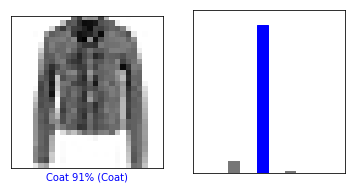

In [70]:
i = 10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

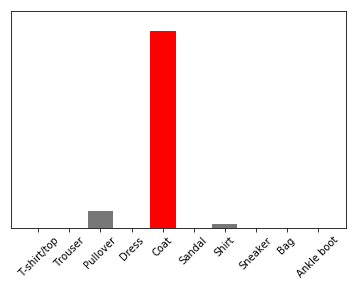

In [71]:
img = test_images[10]
img = (np.expand_dims(img,0))
predictions_single = model.predict(img)
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

## <left>Improving model<a class="anchor" id="improve"></a><left>

In [76]:
class oneCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('loss')<0.1):
            print("\nReached 90% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = oneCallback()

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = keras.models.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(1028, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5) # callbacks=[callbacks]
model.evaluate(test_images, test_labels)

Epoch 1/5
60000/60000 [==============================] - 16s 259us/sample - loss: 0.1863 - acc: 0.9435
Epoch 2/5
60000/60000 [==============================] - 15s 251us/sample - loss: 0.0745 - acc: 0.9768
Epoch 3/5
60000/60000 [==============================] - 15s 256us/sample - loss: 0.0471 - acc: 0.9844
Epoch 4/5
60000/60000 [==============================] - 15s 252us/sample - loss: 0.0329 - acc: 0.9890
Epoch 5/5
10000/10000 [==============================] - 1s 70us/sample - loss: 0.0698 - acc: 0.9815


[0.06980889289545594, 0.9815]

In [77]:
model.evaluate(test_images, test_labels) # Accuracy increase from 0.8799 to 0.9815

10000/10000 [==============================] - 1s 58us/sample - loss: 0.0698 - acc: 0.9815


[0.06980889289545594, 0.9815]

## <left>Same with raw numpy<a class="anchor" id="numpy"></a>

In [120]:
import sys
np.random.seed(42)

In [121]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

images, labels = (x_train.reshape(len(x_train),28*28) / 255, y_train)

one_hot_labels = np.zeros((len(labels),10))
for i,l in enumerate(labels):
    one_hot_labels[i][l] = 1
labels = one_hot_labels

test_images = x_test.reshape(len(x_test),28*28) / 255
test_labels = np.zeros((len(y_test),10))
for i,l in enumerate(y_test):
    test_labels[i][l] = 1

np.random.seed(1)
relu = lambda x:(x>=0) * x # returns x if x > 0, return 0 otherwise
relu2deriv = lambda x: x>=0 # returns 1 for input > 0, return 0 otherwise
alpha, iterations, hidden_size = (0.005, 5, 100)
pixels_per_image, num_labels = (784, 10)

weights_0_1 = 0.2*np.random.random((pixels_per_image,hidden_size)) - 0.1
weights_1_2 = 0.2*np.random.random((hidden_size,num_labels)) - 0.1

for j in range(iterations):
    error, correct_cnt = (0.0,0)
    for i in range(len(images)):
        layer_0 = images[i:i+1]
        layer_1 = relu(np.dot(layer_0,weights_0_1))
        dropout_mask = np.random.randint(2, size=layer_1.shape)
        layer_1 *= dropout_mask * 2
        layer_2 = np.dot(layer_1,weights_1_2)

        error += np.sum((labels[i:i+1] - layer_2) ** 2)
        correct_cnt += int(np.argmax(layer_2) == np.argmax(labels[i:i+1]))
        layer_2_delta = (labels[i:i+1] - layer_2)
        layer_1_delta = layer_2_delta.dot(weights_1_2.T) * relu2deriv(layer_1)
        layer_1_delta *= dropout_mask

        weights_1_2 += alpha * layer_1.T.dot(layer_2_delta)
        weights_0_1 += alpha * layer_0.T.dot(layer_1_delta)

    if(j%1 == 0):
        test_error = 0.0
        test_correct_cnt = 0

        for i in range(len(test_images)):
            layer_0 = test_images[i:i+1]
            layer_1 = relu(np.dot(layer_0,weights_0_1))
            layer_2 = np.dot(layer_1, weights_1_2)

            test_error += np.sum((test_labels[i:i+1] - layer_2) ** 2)
            test_correct_cnt += int(np.argmax(layer_2) == np.argmax(test_labels[i:i+1]))

        sys.stdout.write("\n" + \
                         "I:" + str(j) + \
                         " Test-Err:" + str(test_error/ float(len(test_images)))[0:5] +\
                         " Test-Acc:" + str(test_correct_cnt/ float(len(test_images)))+\
                         " Train-Err:" + str(error/ float(len(images)))[0:5] +\
                         " Train-Acc:" + str(correct_cnt/ float(len(images))))


I:0 Test-Err:0.447 Test-Acc:0.7369 Train-Err:0.564 Train-Acc:0.6540833333333333
I:1 Test-Err:0.434 Test-Acc:0.7637 Train-Err:0.534 Train-Acc:0.6867
I:2 Test-Err:0.409 Test-Acc:0.7788 Train-Err:0.529 Train-Acc:0.6944666666666667
I:3 Test-Err:0.396 Test-Acc:0.7714 Train-Err:0.524 Train-Acc:0.6925333333333333
I:4 Test-Err:0.418 Test-Acc:0.7869 Train-Err:0.525 Train-Acc:0.6949666666666666

## <left>Handwriting Digits MNIST classifier<a class="anchor" id="hdigits"></a>

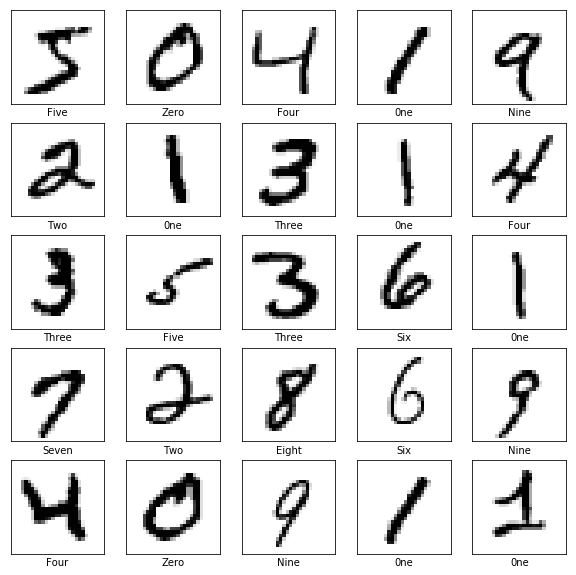

In [48]:
def plotfirst25elems(x,y,size=25):
    o = int(np.sqrt(size))
    if o != np.sqrt(size):
        o += 1
    
    class_names = ['Zero','0ne','Two','Three','Four','Five','Six','Seven','Eight','Nine']
    plt.figure(figsize=(10,10))
    for i in range(size):
        plt.subplot(o,o,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(x[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[y[i]])

mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
plotfirst25elems(x_train,y_train, size=25)

In [57]:
class oneCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('loss')<0.02):
            print("\nReached 98% accuracy so cancelling training!\n")
            self.model.stop_training = True

def train_mnist(x_train, y_train):

    x_train  = x_train / 255


    model = keras.models.Sequential([
        keras.layers.Flatten(),
        keras.layers.Dense(512,activation=tf.nn.relu),
        keras.layers.Dense(128,activation=tf.nn.relu),
        keras.layers.Dense(10,activation=tf.nn.softmax)
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    callbacks = oneCallback()
    
    history = model.fit(x_train,
                        y_train,
                        epochs=50,
                        callbacks=[callbacks])

    return model, history.epoch, history.history['acc'][-1]

In [58]:
model, n_epoch, acc = train_mnist(x_train, y_train)

Epoch 1/50
60000/60000 [==============================] - 15s 256us/sample - loss: 0.1896 - acc: 0.9430
Epoch 2/50
60000/60000 [==============================] - 15s 255us/sample - loss: 0.0808 - acc: 0.9756
Epoch 3/50
60000/60000 [==============================] - 16s 262us/sample - loss: 0.0559 - acc: 0.9823
Epoch 4/50
60000/60000 [==============================] - 15s 248us/sample - loss: 0.0413 - acc: 0.9867
Epoch 5/50
60000/60000 [==============================] - 15s 245us/sample - loss: 0.0328 - acc: 0.9890
Epoch 6/50
60000/60000 [==============================] - 15s 255us/sample - loss: 0.0265 - acc: 0.9910
Epoch 7/50
60000/60000 [==============================] - 15s 244us/sample - loss: 0.0231 - acc: 0.9928
Epoch 8/50
60000/60000 [==============================] - 15s 248us/sample - loss: 0.0202 - acc: 0.9934
Epoch 9/50
59872/60000 [============================>.] - ETA: 0s - loss: 0.0165 - acc: 0.9948
Reached 98% accuracy so cancelling training!

60000/60000 [==============

In [59]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 113us/sample - loss: 0.2746 - acc: 0.9827


[0.2746229679574357, 0.9827]

## <left>Adding Convolution layers<a class="anchor" id="conv1"></a>

In [86]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import models

In [97]:
fashion_mnist = keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fashion_mnist.load_data()

training_images = training_images[0:10000]
training_labels = training_labels[0:10000] 
training_images=training_images.reshape(10000, 28, 28, 1)
training_images = training_images / 255
test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images / 255

model = keras.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=2)
model.evaluate(test_images, test_labels)

Epoch 1/2
10000/10000 [==============================] - 8s 807us/sample - loss: 0.7032 - acc: 0.7447
Epoch 2/2
10000/10000 [==============================] - 3s 286us/sample - loss: 0.4278 - acc: 0.8481


[0.4277955570220947, 0.8481]

In [98]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 11, 11, 64)        9280      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)               204928    
_________________________________________________________________
dense_25 (Dense)             (None, 10)                1290      
Total para

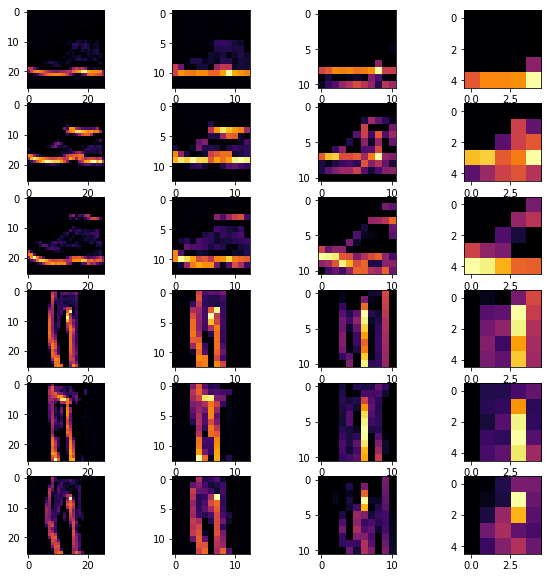

In [99]:
f, axarr = plt.subplots(6,4, figsize=(10, 10))

FIRST_IMAGE=0 # number 9
SECOND_IMAGE=23 # number 9
THIRD_IMAGE=28 # number 9
FOURTH_IMAGE=2 # number 1
FIFTH_IMAGE=3 # number 1
SIXTH_IMAGE=5 # number 1
CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
    f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[0,x].grid(False)

    f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[1,x].grid(False)

    f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[2,x].grid(False)
    
    f4 = activation_model.predict(test_images[FOURTH_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[3,x].imshow(f4[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[3,x].grid(False)
    
    f5 = activation_model.predict(test_images[FIFTH_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[4,x].imshow(f5[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[4,x].grid(False)
    
    f6 = activation_model.predict(test_images[SIXTH_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[5,x].imshow(f6[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[5,x].grid(False)

In [102]:
fashion_mnist = keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fashion_mnist.load_data()

training_images = training_images[0:10000]
training_labels = training_labels[0:10000] 
training_images=training_images.reshape(10000, 28, 28, 1)
training_images = training_images / 255
test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images / 255

model = keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(8, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=2)

Epoch 1/2
10000/10000 [==============================] - 6s 648us/sample - loss: 1.1845 - acc: 0.5568
Epoch 2/2
10000/10000 [==============================] - 5s 524us/sample - loss: 0.7301 - acc: 0.7226


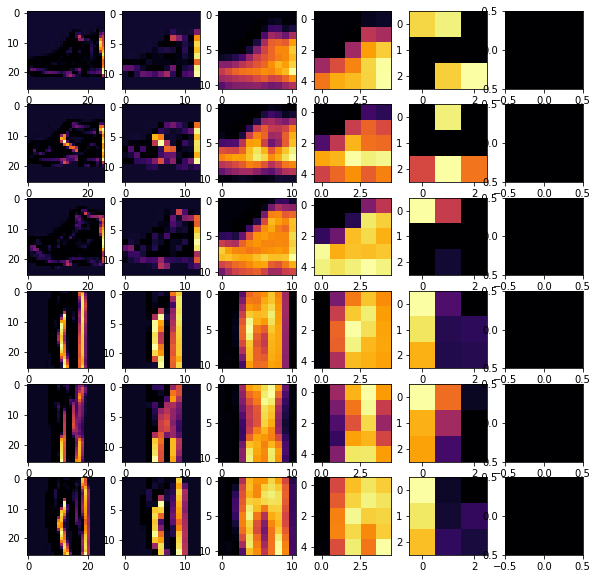

In [103]:
f, axarr = plt.subplots(6,6, figsize=(10, 10))
FIRST_IMAGE=0 # number 9
SECOND_IMAGE=23 # number 9
THIRD_IMAGE=28 # number 9
FOURTH_IMAGE=2 # number 1
FIFTH_IMAGE=3 # number 1
SIXTH_IMAGE=5 # number 1
CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,6):
    f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[0,x].grid(False)

    f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[1,x].grid(False)

    f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[2,x].grid(False)
    
    f4 = activation_model.predict(test_images[FOURTH_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[3,x].imshow(f4[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[3,x].grid(False)
    
    f5 = activation_model.predict(test_images[FIFTH_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[4,x].imshow(f5[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[4,x].grid(False)
    
    f6 = activation_model.predict(test_images[SIXTH_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[5,x].imshow(f6[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[5,x].grid(False)

In [104]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 11, 11, 16)        4624      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 3, 3, 8)           1160      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 1, 1, 8)           0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 8)                 0         
__________